In [1]:
import h5py
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import pandas as pd
import tables
import matplotlib.pyplot as plt
import tensorflow as tf
import preprocessing


In [2]:
dataPath = '/path/to/test.h5'
batch_size = 100

In [3]:
with h5py.File(dataPath, 'r') as data:

    npDataLabels = np.array(data['labels'])

    npDataWeights = np.array(data['weights'])
    
    hlDataArr = {key: data[key][...] for key in data.attrs.get('hl')}


## Preprocessing

In [4]:
processed_dict = preprocessing.high_level(hlDataArr)
processed_df = pd.DataFrame(processed_dict)


Splitting the data into train and test, then splitting the train data into train and validation. Finally turning things into tensorflow datasets as things run faster that way.

In [5]:
data_1, data_test, labels_1, labels_test, weights_1, weights_test = train_test_split(processed_df, npDataLabels, npDataWeights, test_size=0.33, random_state=69, shuffle=True)

data_train, data_valid, labels_train, labels_valid, weights_train, weights_valid = train_test_split(data_1, labels_1, weights_1, test_size = 0.05, random_state=420, shuffle=True)

In [ ]:
train_data_set = tf.data.Dataset.from_tensor_slices((data_train, labels_train, weights_train)).batch(batch_size)

valid_data_set = tf.data.Dataset.from_tensor_slices((data_valid, labels_valid, weights_valid)).batch(batch_size)

## Training now

In [7]:
model = Sequential()
model.add(keras.Input(shape=data_train.shape[1:]))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(20, activation='relu', kernel_regularizer=None, kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', weighted_metrics=['accuracy', 'binary_accuracy'])   

In [8]:
history = model.fit(train_data_set, validation_data=valid_data_set, epochs=8, batch_size=batch_size, verbose=1)

Epoch 1/8
15812/15812 [==============================] - 54s 3ms/step - loss: 0.3731 - accuracy: 0.8312 - binary_accuracy: 0.8312 - val_loss: 0.3752 - val_accuracy: 0.8324 - val_binary_accuracy: 0.8324
Epoch 2/8
15812/15812 [==============================] - 54s 3ms/step - loss: 0.3593 - accuracy: 0.8392 - binary_accuracy: 0.8392 - val_loss: 0.3681 - val_accuracy: 0.8351 - val_binary_accuracy: 0.8351
Epoch 3/8
15812/15812 [==============================] - 54s 3ms/step - loss: 0.3559 - accuracy: 0.8410 - binary_accuracy: 0.8410 - val_loss: 0.3634 - val_accuracy: 0.8370 - val_binary_accuracy: 0.8370
Epoch 4/8
15812/15812 [==============================] - 54s 3ms/step - loss: 0.3538 - accuracy: 0.8421 - binary_accuracy: 0.8421 - val_loss: 0.3620 - val_accuracy: 0.8384 - val_binary_accuracy: 0.8384
Epoch 5/8
15812/15812 [==============================] - 55s 4ms/step - loss: 0.3523 - accuracy: 0.8429 - binary_accuracy: 0.8429 - val_loss: 0.3607 - val_accuracy: 0.8390 - val_binary_accurac

Plotting these things now as exporting the history along with the model is a pain

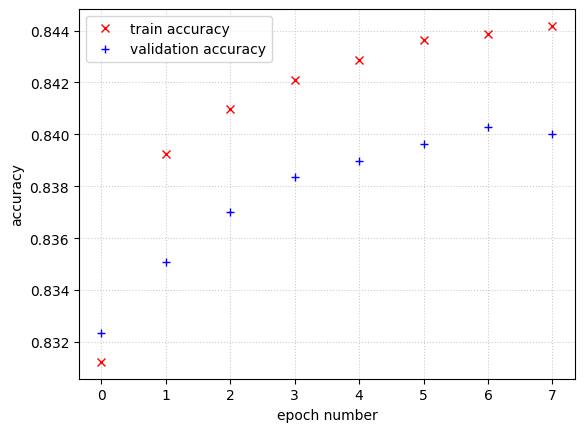

In [13]:
plt.figure()
plt.plot(history.history['accuracy'], 'rx', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'b+', label='validation accuracy')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.grid(color='#CCCCCC', linestyle=':')
plt.legend()
plt.savefig('accuracy_history.pdf')
plt.show()


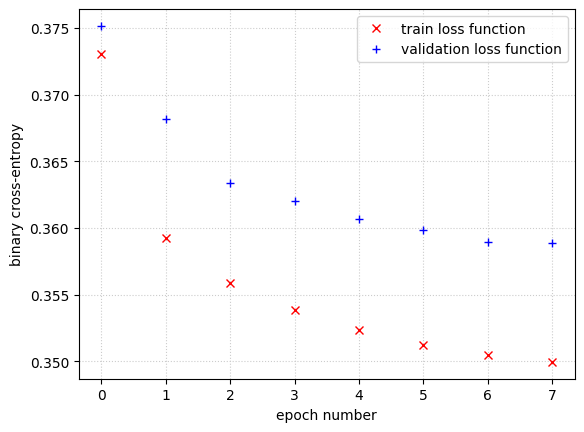

In [16]:
plt.figure()
plt.plot(history.history['loss'], 'rx', label='train loss function')
plt.plot(history.history['val_loss'], 'b+', label='validation loss function')
plt.xlabel('epoch number')
plt.ylabel('binary cross-entropy')
plt.grid(color='#CCCCCC', linestyle=':')
plt.legend()
plt.savefig('loss_history.pdf')
plt.show()


In [17]:
model.save('./models/final_model')

INFO:tensorflow:Assets written to: ./models/final_model/assets
